In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
!git clone https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download.git/spam.tsv

Cloning into 'spam.tsv'...
remote: Not Found
fatal: repository 'https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download.git/spam.tsv/' not found


In [5]:
!git clone https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download.git

Cloning into 'All-CSV-ML-Data-Files-Download'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 38 (delta 2), reused 4 (delta 1), pack-reused 29
Unpacking objects: 100% (38/38), done.


In [8]:
df = pd.read_csv('/content/All-CSV-ML-Data-Files-Download/spam.tsv', sep='\t')

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
len(df)

5572

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

**Balance the data**

In [13]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [14]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [17]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [18]:
ham = ham.sample(spam.shape[0])

In [19]:
ham.shape

(747, 4)

In [20]:
data = ham.append(spam, ignore_index=True)
data.reset_index(inplace=True)

In [21]:
data.shape

(1494, 5)

**Exploratory Data Analysis**

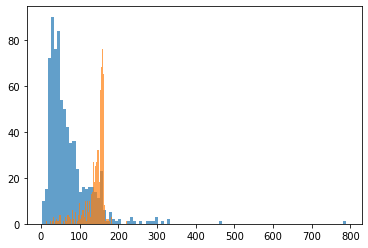

In [24]:
plt.hist(data[data['label'] == 'ham'] ['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam'] ['length'], bins=100, alpha=0.7)
plt.show() #Most of ham messages has less than 100 characters and spam has more than 100 characters

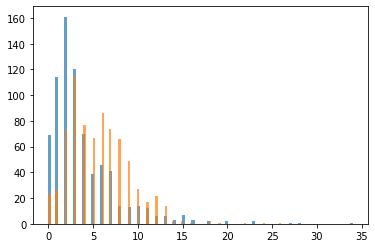

In [25]:
plt.hist(data[data['label'] == 'ham'] ['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam'] ['punct'], bins=100, alpha=0.7)
plt.show() # not much difference between ham and spam with punctuation

**Data preparation**

In [28]:
data.head()

,index,label,message,length,punct
0,0,ham,Going for dinner.msg you after.,31,2
1,1,ham,I want to tel u one thing u should not mistake...,87,2
2,2,ham,Hey you gave them your photo when you register...,88,2
3,3,ham,I am going to sao mu today. Will be done only ...,52,1
4,4,ham,I just cooked a rather nice salmon a la you,43,0


In [41]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])

In [42]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1045,), (1045,), (449,), (449,))

In [43]:
x_train.head()

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Tell my  bad character which u Dnt lik in me. ...
477                Wow v v impressed. Have funs shopping!
542     You are a great role model. You are giving so ...
1277    Ringtone Club: Gr8 new polys direct to your mo...
Name: message, dtype: object

In [44]:
y_train.head()

1128    spam
742      ham
477      ham
542      ham
1277    spam
Name: label, dtype: object

**Bag of words creation (Part of pipeline, hence commented**

In [36]:
#vectorizer = TfidfVectorizer()

In [37]:
#x_train = vectorizer.fit_transform(x_train)

In [38]:
#x_train.shape

(1045, 3729)

**Pipeline and Random Forest classifier**

In [45]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [46]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [47]:
y_pred = clf.predict(x_test)

In [48]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 27, 197]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [50]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [51]:
clf.predict(['Hi, this is krish'])

array(['ham'], dtype=object)

In [57]:
clf.predict(["Congragulations! you have won free tickets to the USA this summer. TEXT 'WON' to 445566 "])

array(['spam'], dtype=object)

**Pipeline and SVM**

In [69]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C=2000, gamma = 'auto'))])

In [70]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=2000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [71]:
y_pred = clf.predict(x_test)

In [72]:
confusion_matrix(y_test, y_pred)

array([[220,   5],
       [ 18, 206]])

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       225
        spam       0.98      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [74]:
accuracy_score(y_test, y_pred)

0.9487750556792873